# Prerequisites and Importing libraries

We opted for a single Data Preprocessing, Data Cleaning, and Sentiment Analysis script to create a usable dataset ready to be implemented into a backend solution and/or used for Streamlit and Tableau to create visualizations out of the final product.  Essentially, this script ensures a smoothless exploration of the Sentiment Analysis performed on the Airbnb dataset since there will be no processing when users interface with our product.

In [1]:
#import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3 as sql

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
nltk.download('vader_lexicon')
nltk.download('punkt')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad

from sklearn import feature_extraction
from sklearn.metrics import confusion_matrix
from sklearn import model_selection as ms
from sklearn import naive_bayes
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jrucs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jrucs\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jrucs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Preprocessing and Data Cleaning

Our project required the Airbnb dataset which unfortunately, Airbnb does not have an official API to implement in code for pulling their datasets automatically.  For convenience, we have posted the raw datasets on Box found at this link: https://uofi.box.com/s/tlfd2gd2h40nq90110u72c7p750zogqd.  To gather these datasets, we had to navigate to http://insideairbnb.com/get-the-data/ and ctrl + f to search for our desired city of interest.  Specifically, we are interested in downloading the "listings.csv.gz" and the "reviews.csv.gz" for our use case.  We downloaded each city's dataset into its own folder named after the city and then uncompressed the "listings.csv.gz" and the "reviews.csv.gz" in there.

After downloading and uncompressing our raw datasets, we initiate four variables which consists of two lists, one counter named "s", and an empty DataFrame.  The first list "cities", consists of the cities we targeted and the second list "state", includes the state where the city resides.  The "s" variable is used as a counter to call the state list as an index in the below \#4 comment.  As the script iterates through each city, the empty DataFrame will be used to append the preprocessed and cleaned DataFrames.  We will now step through each numbered comment in this Data Preprocessing and Data Cleaning script.


<b>\#1 comment:</b><br>
The for loop iterates through each city's raw datasets of "listings.csv" and "reviews.csv".  The code here specifically targets the "listings.csv" and keeps only the columns required for our use case.<br>

<b>\#2 comment:</b><br>
Targets the "review.csv" and only keeps the two columns, "listing_id" and "comments".<br>

<b>\#3 comment:</b><br>
Accomplishes a merge of the "listings" on the "id" column and "reviews" on the "listing_id" column.  This merge would add the comments of reviews to the listing's properties.  We then drop the "listing_id" column in the final DataFrame.<br>

<b>\#4 comment:</b><br>
Renames the "host_location" to "location" and "review_scores_value" to "review_scores" for easier readability. Then the "location" column is reassigned new values based on the city and state it is currently iterating to.  This is done to identify which initial dataset the record derived from.<br>

<b>\#5 comment:</b><br>
Pivots over to data cleaning.  This part of the script handles non-English characters utilizing a lambda function.  A lambda function was implemented since OpenRefine was not handling the removal of non-English characters correctly.<br>

<b>\#6 comment:</b><br>
Removes all html tags in the "comments" column.  OpenRefine was letting us down again by not removing html tags with the given options.  Specifically, we had \<br> tags after accomplishing some Exploratory Data Analysis (EDA).<br>

<b>\#7 comment:</b><br>
Removes punctuations in the "comments" column.  After removing non-English characters, html tags and punctuations, we ended up with empty values.<br>

<b>\#8 comment:</b><br>
Removes whitespace in the "comments" column.  Lastly, OpenRefine was not properly removing whitespace with its built in functions.  Instead of cleaning with OpenRefine, we just decided to implement all the required steps in this script.<br>

<b>\#9 comment:</b><br>
Drops any duplicate records when the "comments" value are the same.  This was necessary since many records were duplicated.<br>

<b>\#10 comment:</b><br>
Drops any records which are empty or have a null value.  The intial dataset had null values and after implementing the above cleaning steps, we ended up with a few more so we removed them before proceeding to the next step.<br>

<b>\#11 comment:</b><br>
Queries the DataFrame for any "review_scores" that are less than or equal to "3.0".  It then groups the records by their "id" so that we target all listings and then takes a sample of "10" from each listing with the replace option set to True.  Replace set to True in this instance allows us to retrieve up to 10 records while not throwing an error if a listing does not have 10 records.  The negative part is that if a listing has less than 10 records, it will add duplicates until it reaches 10 but this can be handled later by dropping duplicates again.  We then assign the 10 records for each listing with a score of less than or equal to "3.0" into a new DataFrame variable.  Next, we query the original DataFrame for any "review_scores" for greater than "3.0" and groupby "id" to target all listing and then take a sample of "5" from each listing with the replace option set to True.  We only queried for "5" because after accomplishing some EAD and researching, Airbnb mentions their listings have over 95% positive reviews.  Additionally, lower scored listings have less reviews.  These queries were implemented instead of accomplishing a random selection from each listing to combat this imbalanced dataset.  The lower "review_scores" DataFrame is then appended to the higher "review_scores" DataFrame.<br>

<b>\#12 comment:</b><br>
Drops any duplicates when the "comments" value is the same.<br>

<b>\#13 comment:</b><br>
Drops any records with missing values.<br>

<b>\#14 comment:</b><br>
We begin pivoting over to the analysis portion by converting the "comments" values to strings and lowercasing.<br>

<b>\#15 comment:</b><br>
We then tokenize the values in the "comments" column.<br>

<b>\#16 comment:</b><br>
We then remove the stop words in the "comments" column after tokenization utlizing a lambda function.<br>

<b>\#17 comment:</b><br>
Append the prepared and cleaned DataFrame into the empty DataFrame we created at the beginning.<br>

<b>\#18 comment:</b><br>
Increment the "s" counter variable to iterate through the state list for what happens in the \#4 comment.

In [2]:
cities = ['Los Angeles', 'San Francisco', 'Chicago', 'Nashville', 'Boston', 'New Orleans', 'Austin', 'Denver']
state = ['CA', 'CA', 'IL', 'TN', 'MA', 'LA', 'TX', 'CO']
s = 0
df_main = pd.DataFrame()

#1 iterate and read listings local file directory/keep the required columns for merging
for city in cities:
    print(city)
    listings = pd.read_csv(f'{city}/listings.csv')
    listings = listings.loc[:, ['id',
                         'name',
                         'host_location',
                         'neighbourhood_cleansed',
                         'latitude',
                         'longitude',
                         'price',
                         'review_scores_value']]

    #2 read reviews local file directory/keep the required columns for merging
    reviews = pd.read_csv(f'{city}/reviews.csv')
    reviews = reviews.loc[:, ['listing_id', 'comments']]

    #3 merge the listing and reviews datasets and keep only the required columns for our use case
    df = listings.merge(reviews, left_on='id', right_on='listing_id')
    df = df.loc[:, ['id',
                    'name',
                    'host_location',
                    'neighbourhood_cleansed',
                    'latitude',
                    'longitude',
                    'price',
                    'review_scores_value',
                    'comments']]

    #4 rename columns & from identified list variables, change the value to city, state
    df = df.rename(columns={'host_location':'location', 'review_scores_value':'review_scores'})
    df['location'] = f'{city}, {state[s]}'

    #5 remove non-ASCII characters
    u = df.select_dtypes(object)
    df[u.columns] = u.apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

    #6 remove html tags from the comments
    df['comments'] = df['comments'].str.replace(r'<[^<>]*>', '', regex=True)

    #7 remove punctuation
    df['comments'] = df['comments'].str.replace(r'[^\w\s]+', '', regex=True)

    #8 remove whitespace
    df['comments'] = df['comments'].str.strip()

    #9 drop any rows with duplicate comments
    df = df.drop_duplicates(['comments'])

    #10 drop rows that are missing values
    df = df.dropna()
    
    #11 query review_scores column for <= 3.0 and > 3.0, then groupby the id column
    # take 10 samples from <= 3.0 and 5 samples from > 3.0
    df_tail = df.query('review_scores <= 3.0').groupby('id').sample(10, replace=True)
    df = df.query('review_scores > 3.0').groupby('id').sample(5, replace=True)
    df = df.append(df_tail)

    #12 drop any rows with duplicate comments
    df = df.drop_duplicates(['comments'])

    #13 drop rows that are missing values
    df = df.dropna()

    #14 convert the comments values to string and lowercase
    df['comments'] = df['comments'].astype(str)
    df['comments'] = df['comments'].str.lower()

    #15 tokenize words in the comments
    df['comments'] = df['comments'].apply(word_tokenize)

    #16 remove stop words from the tokens
    df['comments'] = df['comments'].apply(lambda x: ' '.join([item for item in x if item not in stop]))

    #17 merging files
    df_main = df_main.append(df)

    #18 increment s to iterate through given city/state lists
    s += 1

Los Angeles
San Francisco
Chicago
Nashville
Boston
New Orleans
Austin
Denver


# Vader Sentiment Analysis

<b>Introduction to Vader:</b><br>
After spending some time researching about which tool to leverage for performing sentiment analysis, we decided to go forward with VADER. “VADER (Valence Aware Dictionary and SentimentReasoner) is a lexicon and rule-based sentiment analysis tool”. It is known to perform well with the review’s dataset spanning from social media to movies and products. Since we were utilizing the Airbnb dataset and review field, we decided to use the VADER algorithm to perform sentiment analysis.


<b>How Vader Works:</b><br>
There are three different values within the algorithm including Positive, Negative, and Neutral. One nice advantage of Vader is that in addition to displaying whether a review is positive or negative, it also specifies how positive or negative the review is. This can easily be seen by looking at our results. When we pass our data frame to VADER, it first looks to see if any of the words from the data frame exists in the VADER lexicon. From there using the polarity function, we can then retrieve the polarity values. The compound score sums up the lexicon ratings and normalize the values to create a final value which displays the sentiment.

<b>How the scores work:</b><br>
There are different ways of setting up the threshold, but we went with the standard way. In our case, we have kept the positive sentiment as having the compound score greater than equal to 0.05. The negative reviews are the ones with compound scores less than equal to 0.05. Everything else is kept neutral.

<b>Plotting the values:</b><br>
Once we get through the process of retrieving the sentiment based on the dataframe, we then plot the values that we got from using VADER algorithm. As discussed earlier, since our dataset comprises of mostly positive reviews; we see a big set of positive reviews.

<b>Reference:</b><br>
https://www.researchgate.net/profile/Janardhan-Naulegari/publication/333602124_A_Comprehensive_Study_on_Lexicon_Based_Approaches_for_Sentiment_Analysis/links/5d13452ca6fdcc2462a688ed/A-Comprehensive-Study-on-Lexicon-Based-Approaches-for-Sentiment-Analysis

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad

# copying the data into a new dataframe called vader
#vader = df_main.copy()
sentiment = vad()

# making additional columns for sentiment score in the vader dataframe
sen = ['Positive', 'Negative', 'Neutral']
sentiments = [sentiment.polarity_scores(i) for i in df_main['comments'].values]
df_main['Vad_Negative_Score'] = [i['neg'] for i in sentiments]
df_main['Vad_Positive_Score'] = [i['pos'] for i in sentiments]
df_main['Vad_Neutral_Score'] = [i['neu'] for i in sentiments]
df_main['Vad_Compound_Score'] = [i['compound'] for i in sentiments]
score = df_main['Vad_Compound_Score'].values
t = []

for i in score:
    if i >= 0.05:
        t.append('Positive')
    elif i <= -0.05:
        t.append('Negative')
    else:
        t.append('Neutral')
        
df_main['Overall_Sentiment'] = t

<AxesSubplot:title={'center':'Over All Sentiment'}, ylabel='Overall_Sentiment'>

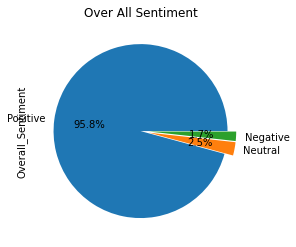

In [4]:
# pie chart
explode = [0, 0.1, 0.1]
df_main["Overall_Sentiment"].value_counts().plot.pie(title="Over All Sentiment",autopct='%1.1f%%', explode = explode)

# Evaluating our Sentiment Analysis using Classifiers
CountVectorizer is part of the scikit-learn python library. It is used to transform the given text which in our case is the data frame which is preprocessed and then converts it into a vector based on the frequency of each word in that entire data frame. It converts each word into its own vector and that way it can be a very powerful tool if we wanted to inquire about the unique words. For our data set, we can see that it gives us a value of (318067, 89) which essentially means that we have 318067 rows of data with 89 unique words.
Reference:
https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

In [5]:
# Count Vectorization
counts = feature_extraction.text.CountVectorizer()
X = counts.fit_transform(df_main['review_scores'].astype(str).values)
X.shape

(318067, 89)

In [6]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_main['Overall_Sentiment']= label_encoder.fit_transform(df_main['Overall_Sentiment'])
df_main['Overall_Sentiment'].unique()
y = df_main['Overall_Sentiment'].values

In [7]:
# Train Test Split
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# print final dataset
df1 = df_main.to_csv('Dataset_Final.csv', sep=',', index=False)

# Multinomial Naive Bayes

Naive Bayes is a fairly simple group of probabilistic algorithms that, for sentiment analysis classification, assigns a probability that a given word or phrase should be considered neutral, positive or negative. Naive Bayes calculates words against each other. So, with machine learning models trained for word polarity, we can calculate the likelihood that a word, phrase, or text is neutral, positive or negative.<br>

In this case, we have split train and test sample into 80:20 ratio. Trained the algorithm on 80 % data and tested on 20 %. We were able to score 96% of precision score on test data.

In [9]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

m3 = 'MultinomialNB'
rf = MultinomialNB()
classifier = rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)           
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("\n")

score_rf = rf_acc_score*100
print("MultinomialNB:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



MultinomialNB: 95.76351117678499 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1155
           1       0.00      0.00      0.00      1540
           2       0.96      1.00      0.98     60919

    accuracy                           0.96     63614
   macro avg       0.32      0.33      0.33     63614
weighted avg       0.92      0.96      0.94     63614



In [10]:
!pip install mlxtend

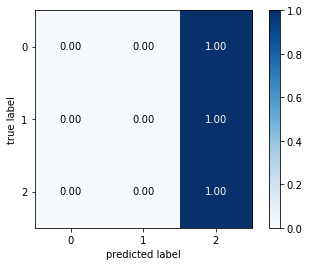

In [11]:
# Imports
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

figure, ax = plot_confusion_matrix(conf_mat = rf_conf_matrix,
                                  #  class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

# Support Vector Machine (SVM)

A support vector machine is another supervised machine learning model, similar to linear regression but more advanced. SVM uses algorithms to train and classify text within our sentiment polarity model, taking it a step beyond X/Y prediction. We have used SVM as multi class classification algorithm.<br>

In case of SVM, We trained the algorithm on 80 % data and tested on 20 % data and achieved the precision of 96%.

In [12]:
# SVM
from sklearn import svm

m3 = 'SVM'
rf =  svm.SVC(decision_function_shape='ovo')
classifier = rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)           
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("\n")

score_rf = rf_acc_score*100
print("SVM:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



SVM: 95.76351117678499 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1155
           1       0.00      0.00      0.00      1540
           2       0.96      1.00      0.98     60919

    accuracy                           0.96     63614
   macro avg       0.32      0.33      0.33     63614
weighted avg       0.92      0.96      0.94     63614



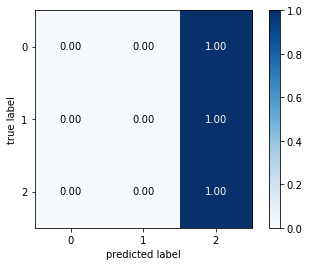

In [13]:
# Confusion Matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

figure, ax = plot_confusion_matrix(conf_mat = rf_conf_matrix,
                                  #  class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

# Random Forest Classifier

Random forest classifier is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression. We have used it as multiclass classification algorithm to calculate the neutral, negative, and positive sentiments.<br>

We have achieved the precision score of 96% on test data.

In [14]:
# Random Forest Classifier
#!pip install scikit-learn
#from sklearn.ensemble import _forest as forest
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(max_depth=3)
classifier = rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)           
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("\n")

score_rf = rf_acc_score*100
print("Random Forest :",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



Random Forest : 95.76351117678499 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1155
           1       0.00      0.00      0.00      1540
           2       0.96      1.00      0.98     60919

    accuracy                           0.96     63614
   macro avg       0.32      0.33      0.33     63614
weighted avg       0.92      0.96      0.94     63614



# Build a SQLite for Backend

SQLite is a small, fast, self-contained, high-reliability, full-featured, SQL database engine. With this project , we explored storing the Airbnb dataset and creating a database so as to integrate it with the front end applications. Here are few instructions/steps how to spin up the data base at run time and start using it for the project:

1. Download the precompiled binary files for the sqlite based on your operating system - https://www.sqlite.org/download.html
2. Once you download, store it in the following folder - CourseProject_CS410_Meep_Meep\Archive\spinupdatabase\sqlite and run the exe file.
3. Download the Airbnb data set from the link and store it in the following directory – CourseProject_CS410_Meep_Meep\Archive\spinupdatabase\dataset(Please know this data set is originally downloaded from a public website - http://insideairbnb.com/get-the-data/ and multiple passes of clean up job is performed on it)
4. Now if you look at the spinupdatabase folder in the project repo – there are two python files inside it. The python file named “createdatabase.py” is run locally to create the database and an empty table with the required fields and defined primary and foreign keys. The Second python file “loadlistingdata.py” is run to load the dataset into the database and table. There is also a line of code that will test your database connection and query.
5. Now as we moved towards the front end of the project , the streamlit application UX was built to directly upload the cleaned spreadsheet and the results are displayed. So, we did not find a real purpose to integrate the database here. However, we did integrate the databse with jupyter notebook for the sentiment analysis to test and ensure that the database works fine. The "SentimnentAnalysis_sqlintegrated.ipynb" file is at teh following location - CourseProject_CS410_Meep_Meep\Archive

Note : Worth noting that we have created the framework which will spin up the data base in minutes and will be ready to be used by anyone who wants to integrate and do an enhancement on the project.All these can be installed and executed as part of the cloned project from the github.

In [15]:
import sqlite3 as sql

# create sql database from csv file
dataset = pd.read_csv("Dataset_Final.csv", header=0)
db_conn = sql.connect("airbnb_dataset.db")
dataset.to_sql("airbnb_dataset", db_conn, if_exists='append', index=False)

# test case
#austinlisting = pd.read_sql("SELECT * FROM airbnb_dataset where id = 5456 LIMIT 5", db_conn)
#print(austinlisting)

db_conn.close()

In [16]:
# create primary key
db_conn = sql.connect("airbnb_dataset.db")
con = db_conn.cursor()

con.execute(
    """CREATE TABLE listing (
        id INTEGER, 
        name TEXT,
        location TEXT,
        neighbourhood TEXT,
        latitude REAL,
        longitude REAL,
        price REAL,
        review_scores REAL,
        comments TEXT,
        PRIMARY KEY(id)
        );"""
)

db_conn.close()